# DB Scan clustering Clustering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment10/DBScan.ipynb)


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/gdrive/MyDrive/DataMining/userbehaviour.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


The dataset contains the following columns:

* userid: A unique identifier for each user.
* Average Screen Time: Average screen time of the user in some time unit.
* Average Spent on App (INR): Average amount spent on the app by the user in Indian Rupees.
* Left Review: Indicates whether the user left a review (1) or not (0).
Ratings: The rating given by the user.
* New Password Request: Number of times the user requested a new password.
* Last Visited Minutes: The number of minutes since the user last visited.
* Status: Indicates whether the app is installed or uninstalled by the user.

In [4]:
# Perform a basic analysis of the data

# Checking for missing values
missing_values = data.isnull().sum()

# Understanding data types
data_types = data.dtypes

# Descriptive statistics
descriptive_stats = data.describe()

missing_values, data_types, descriptive_stats


(userid                        0
 Average Screen Time           0
 Average Spent on App (INR)    0
 Left Review                   0
 Ratings                       0
 New Password Request          0
 Last Visited Minutes          0
 Status                        0
 dtype: int64,
 userid                          int64
 Average Screen Time           float64
 Average Spent on App (INR)    float64
 Left Review                     int64
 Ratings                         int64
 New Password Request            int64
 Last Visited Minutes            int64
 Status                         object
 dtype: object,
             userid  Average Screen Time  Average Spent on App (INR)  \
 count   999.000000           999.000000                  999.000000   
 mean   1500.000000            24.390390                  424.415415   
 std     288.530761            14.235415                  312.365695   
 min    1001.000000             0.000000                    0.000000   
 25%    1250.500000            12

The dataset consists of 999 entries with 8 columns, and there are no missing values in any of the columns. Here's a summary of the dataset:

* userid: The user IDs range from 1001 to 1999.
* Average Screen Time: This is a float value, with a mean of approximately 24.39. The minimum and maximum values are 0 and 50, respectively.
* Average Spent on App (INR): Another float column with a mean spending of around 424.42 INR. The spending ranges from 0 to 998 INR.
* Left Review: This is an integer column indicating whether a review was left (1) or not (0). Approximately 50% of the entries have left a review.
* Ratings: This integer column has values ranging from 0 to 10, with a mean rating of about 6.51.
* New Password Request: The number of new password requests made by users ranges from 1 to 15, with a mean of around 4.94.
* Last Visited Minutes: This integer column shows the minutes since the last visit, ranging from 201 to 49715, with a mean of around 5110.90.
* Status: This object (string) column indicates the app's status as either 'Installed' or 'Uninstalled'.

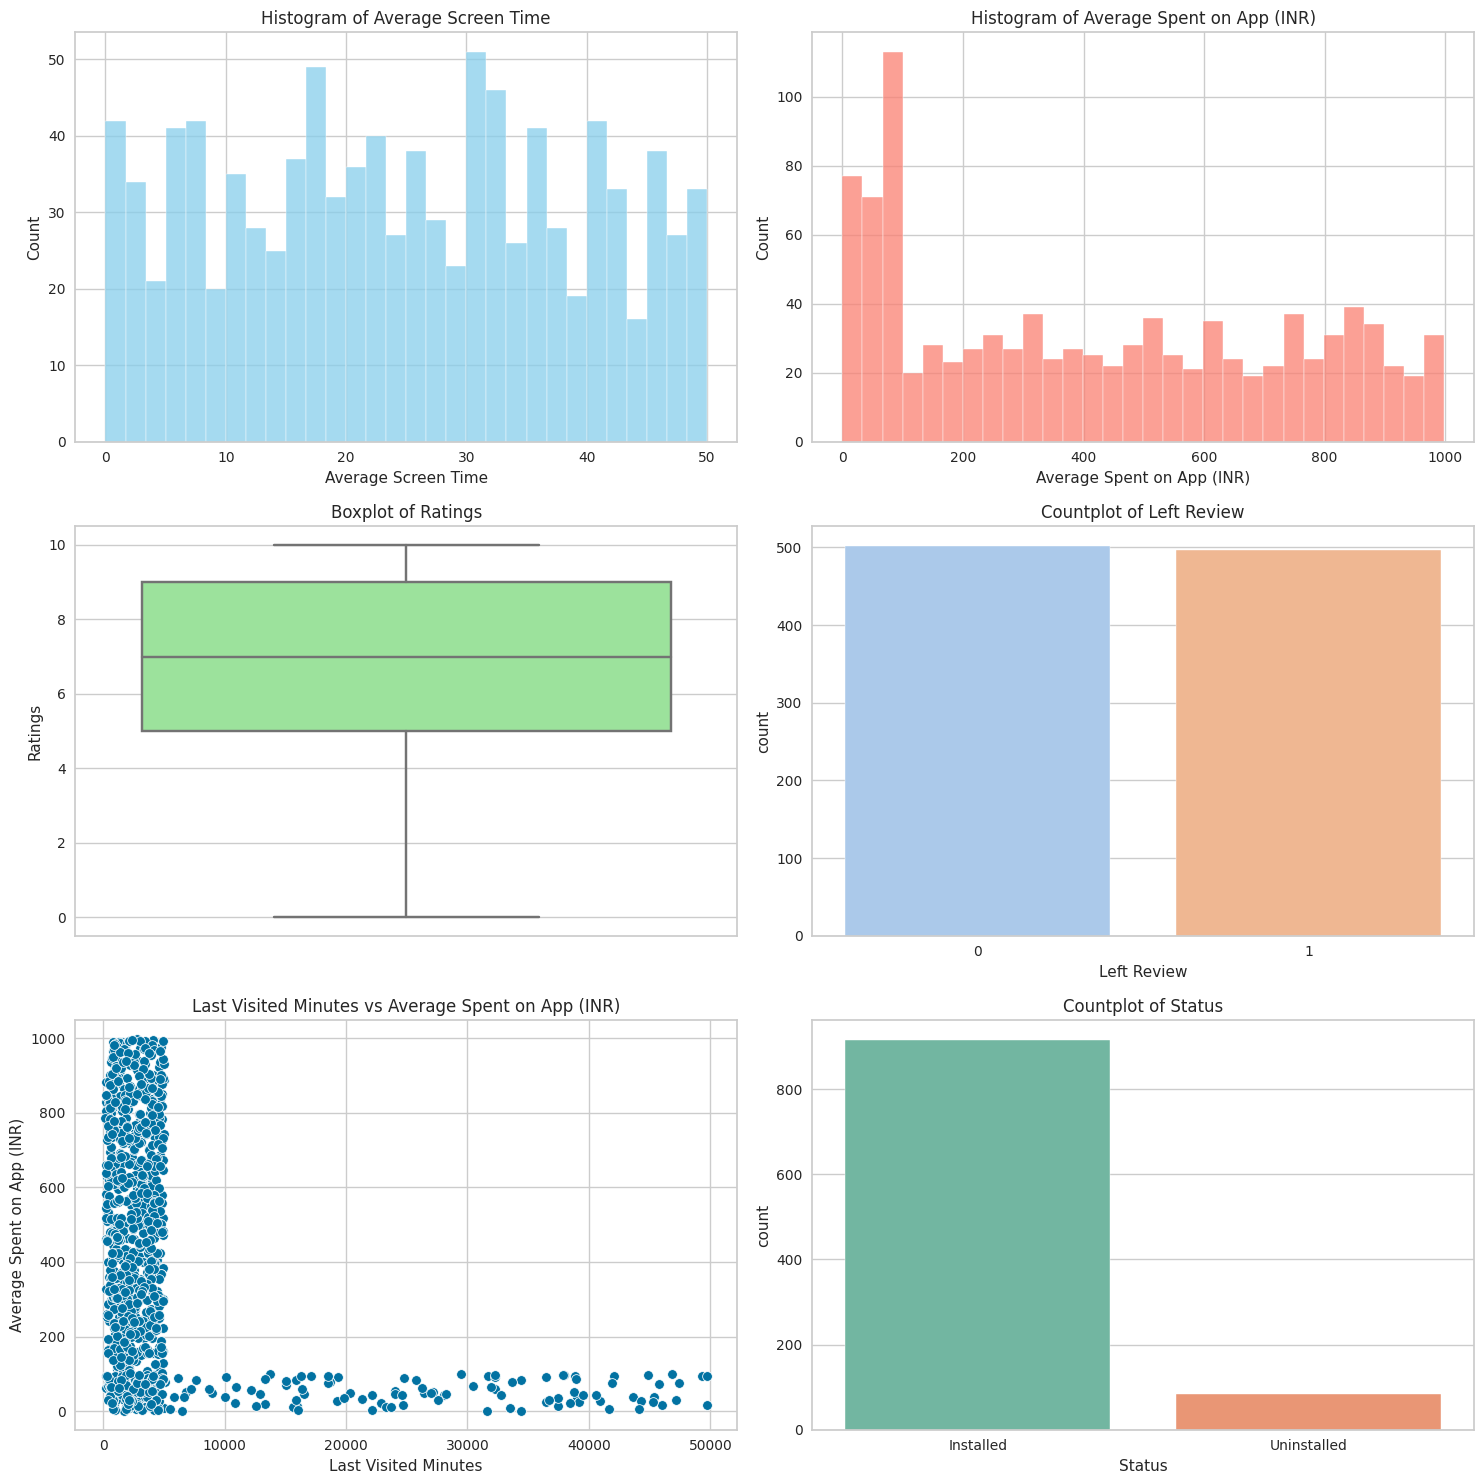

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure to plot multiple plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Histogram for Average Screen Time
sns.histplot(data['Average Screen Time'], bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histogram of Average Screen Time')

# Histogram for Average Spent on App
sns.histplot(data['Average Spent on App (INR)'], bins=30, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Histogram of Average Spent on App (INR)')

# Boxplot for Ratings
sns.boxplot(y=data['Ratings'], ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Boxplot of Ratings')

# Countplot for Left Review
sns.countplot(x='Left Review', data=data, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Countplot of Left Review')

# Scatterplot for Last Visited Minutes vs Average Spent on App
sns.scatterplot(x='Last Visited Minutes', y='Average Spent on App (INR)', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Last Visited Minutes vs Average Spent on App (INR)')

# Countplot for Status
sns.countplot(x='Status', data=data, ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Countplot of Status')

# Adjust the layout
plt.tight_layout()
plt.show()


Here are the visualizations for the dataset:

* Histogram of Average Screen Time: This shows the distribution of average screen time across the users. It seems to be fairly evenly distributed.

* Histogram of Average Spent on App (INR): The spending distribution is also visualized here. Most users seem to spend in the lower range, with fewer users spending higher amounts.

* Boxplot of Ratings: This boxplot displays the distribution of ratings. It provides a good view of the median, quartiles, and potential outliers.

* Countplot of Left Review: This countplot shows the distribution of users who have left a review versus those who haven't. The two groups appear to be almost evenly split.

* Scatterplot of Last Visited Minutes vs Average Spent on App (INR): This scatterplot helps to understand if there's any visible relationship between the time since last visit and the average spending on the app.

* Countplot of Status: The final plot shows the distribution of users who have installed versus uninstalled the app.

In [6]:
# Data Preprocessing

# Checking for any duplicate entries
duplicates = data.duplicated().sum()

# Converting categorical data to numerical data
# For the 'Status' column, we can use one-hot encoding or label encoding
data_encoded = pd.get_dummies(data, columns=['Status'], drop_first=True)

# Checking the encoded data
encoded_head = data_encoded.head()

duplicates, encoded_head


(0,
    userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
 0    1001                 17.0                       634.0            1   
 1    1002                  0.0                        54.0            0   
 2    1003                 37.0                       207.0            0   
 3    1004                 32.0                       445.0            1   
 4    1005                 45.0                       427.0            1   
 
    Ratings  New Password Request  Last Visited Minutes  Status_Uninstalled  
 0        9                     7                  2990                   0  
 1        4                     8                 24008                   1  
 2        8                     5                   971                   0  
 3        6                     2                   799                   0  
 4        5                     6                  3668                   0  )

The preprocessing steps have been executed with the following outcomes:

* Duplicate Entries: There are no duplicate entries in the dataset.
* Categorical Data Encoding: The 'Status' column, which was categorical ('Installed' or 'Uninstalled'), has been converted into a numerical format using one-hot encoding. This results in a new column Status_Uninstalled where the value is 1 if the status is 'Uninstalled' and 0 otherwise.

With no duplicates and the categorical data now encoded, the dataset is in a good shape for further analysis.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded.drop(['userid'], axis=1)) # Dropping userid as it's not a feature

# Applying DBSCAN
# Choosing epsilon and min_samples can be challenging, starting with some common choices
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

# Adding the cluster labels to the dataset
data_encoded['Cluster'] = clusters

# Calculating silhouette score to assess the quality of clustering
silhouette_avg = silhouette_score(scaled_features, clusters)

# Checking the first few rows with cluster labels
clustered_data_head = data_encoded.head()

silhouette_avg, clustered_data_head


(-0.34337133921126206,
    userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
 0    1001                 17.0                       634.0            1   
 1    1002                  0.0                        54.0            0   
 2    1003                 37.0                       207.0            0   
 3    1004                 32.0                       445.0            1   
 4    1005                 45.0                       427.0            1   
 
    Ratings  New Password Request  Last Visited Minutes  Status_Uninstalled  \
 0        9                     7                  2990                   0   
 1        4                     8                 24008                   1   
 2        8                     5                   971                   0   
 3        6                     2                   799                   0   
 4        5                     6                  3668                   0   
 
    Cluster  
 0       -1  
 1       -1  
 

The DBSCAN clustering algorithm has been applied to the scaled features of the dataset. Here are the key points:

* Silhouette Score: The silhouette score is -0.343. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A negative value, as in this case, suggests that the data points might not have been clustered very effectively.

* Cluster Labels: Each row in the dataset has been assigned a cluster label. In the output, a cluster label of -1 indicates that the point is considered as noise by the DBSCAN algorithm, i.e., it does not belong to any cluster.

Given the negative silhouette score, it might be worthwhile to experiment with different values of eps (epsilon) and min_samples parameters in the DBSCAN algorithm. These parameters significantly influence the clustering outcome.

eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other. min_samples is the number of samples in a neighborhood for a point to be considered as a core point.

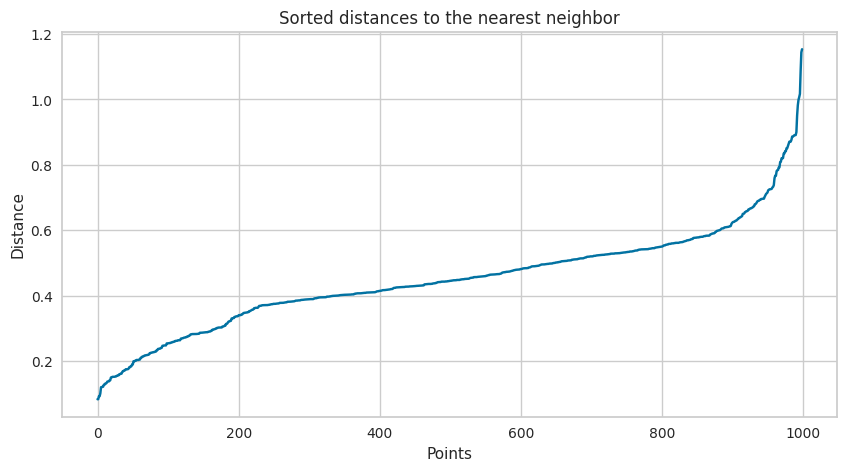

In [8]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# To choose an appropriate value for eps, we can use the NearestNeighbors to calculate the average distance to the nearest n points for each point
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)

# Sort and plot the distances to the nearest point
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('Sorted distances to the nearest neighbor')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()


The plot above shows the sorted distances of each point to its nearest neighbor. This kind of plot is often used to help determine a good value for eps in the DBSCAN algorithm.

In the plot, we look for the point of maximum curvature, which is often referred to as the "elbow point." This point is typically considered as a good estimate for eps.

From the plot, it appears that the elbow point is around a distance of 0.5 to 1.0. We can use this range as a starting point to experiment with different values of eps.

We can also experiment with different values for min_samples. Common practice is to start with a value equal to the number of features in the dataset or a little higher.

In [9]:
# Experimenting with different values for eps and min_samples

# List of values for eps and min_samples to try
eps_values = [0.5, 0.75, 1.0]
min_samples_values = [5, 7, 10]

# Store the results
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_features)

        # Calculate silhouette score
        # Note: We exclude noise points (label -1) from the silhouette score calculation
        if len(np.unique(clusters)) > 1:  # Ensure there's more than one cluster (excluding noise)
            silhouette_avg = silhouette_score(scaled_features, clusters)
        else:
            silhouette_avg = 'NA'  # Not applicable if only one cluster

        results.append((eps, min_samples, silhouette_avg))

# Convert results to DataFrame for easier display
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score'])
results_df.sort_values(by='silhouette_score', ascending=False)  # Sorting by silhouette score



,eps,min_samples,silhouette_score
7,1.00,7,0.235585
8,1.00,10,0.234863
6,1.00,5,0.232591
3,0.75,5,0.123649
2,0.50,10,0.077869
4,0.75,7,0.075067
5,0.75,10,-0.076086
1,0.50,7,-0.235214
0,0.50,5,-0.343371


The silhouette scores have improved significantly with the adjusted parameters. The highest silhouette score is observed with eps at 1.00 and min_samples at 7, yielding a score of approximately 0.2356. This indicates a more effective clustering compared to the initial attempt.

In [10]:
# Applying DBSCAN with optimized parameters

# DBSCAN with eps=1.00 and min_samples=7
optimal_dbscan = DBSCAN(eps=1.00, min_samples=7)
optimal_clusters = optimal_dbscan.fit_predict(scaled_features)

# Adding the optimal cluster labels to the dataset
data_encoded['Optimal_Cluster'] = optimal_clusters

# Check the distribution of the clusters
cluster_distribution = data_encoded['Optimal_Cluster'].value_counts()

# Displaying a few rows with the new clusters and the cluster distribution
optimal_clustered_data_head = data_encoded.head()
cluster_distribution, optimal_clustered_data_head


( 1    458
  0    457
 -1     63
  2     21
 Name: Optimal_Cluster, dtype: int64,
    userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
 0    1001                 17.0                       634.0            1   
 1    1002                  0.0                        54.0            0   
 2    1003                 37.0                       207.0            0   
 3    1004                 32.0                       445.0            1   
 4    1005                 45.0                       427.0            1   
 
    Ratings  New Password Request  Last Visited Minutes  Status_Uninstalled  \
 0        9                     7                  2990                   0   
 1        4                     8                 24008                   1   
 2        8                     5                   971                   0   
 3        6                     2                   799                   0   
 4        5                     6                  3668          

The DBSCAN algorithm with the optimized parameters (eps=1.00 and min_samples=7) has yielded the following cluster distribution in the dataset:

* Cluster 1: 458 data points
* Cluster 0: 457 data points
* Cluster -1 (noise): 63 data points
* Cluster 2: 21 data points

In this clustering, most data points are grouped into two main clusters (Cluster 1 and Cluster 0), with a smaller third cluster (Cluster 2) and some data points categorized as noise (Cluster -1).

The presence of a noise cluster (-1) indicates that these points do not fit well into any of the defined clusters, according to the parameters of the DBSCAN algorithm.

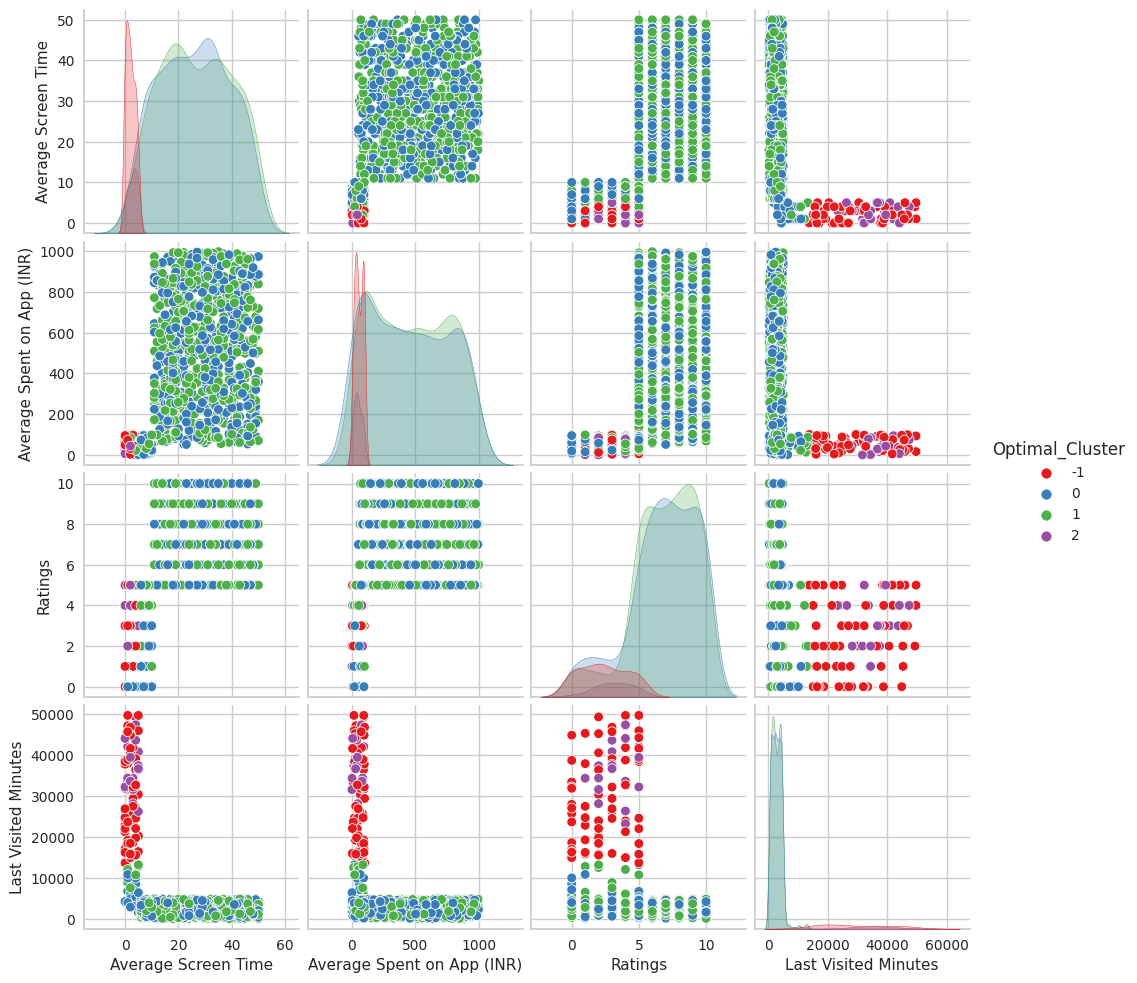

In [11]:
# Visualizing the clustering results using a pairplot
# Due to the high dimensionality of the data, we'll select a subset of features for visualization

# Selecting a subset of features
features_to_visualize = ['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'Last Visited Minutes', 'Optimal_Cluster']

# Creating a pairplot
sns.pairplot(data_encoded[features_to_visualize], hue='Optimal_Cluster', palette='Set1', diag_kind='kde')
plt.show()


In [12]:
!pip install pycaret

In [15]:
from pycaret.clustering import *

# Setup the clustering
clustering_setup = setup(data, session_id=123, ignore_features=['userid'], normalize=True)

# Create a model with DBSCAN
dbscan_model = create_model('dbscan', eps=1.0, min_samples=7)

# Assigning the clusters to the dataset
dbscan_results = assign_model(dbscan_model)

# Plotting cluster results
plot_model(dbscan_model, plot='tsne')





,Description,Value
0,Session id,123
1,Original data shape,"(999, 8)"
2,Transformed data shape,"(999, 7)"
3,Ignore features,1
4,Ordinal features,1
5,Numeric features,6
6,Categorical features,1
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2356,351.0317,1.7747,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [16]:
plot_model(dbscan_model, plot='distribution') # Distribution plot
